# Advocate Test Work Notebook
--------

### 1. Imports

In [1]:
from qiskit import *
from qiskit import QuantumCircuit, BasicAer, execute
from qiskit.tools.visualization import plot_histogram
from qiskit.visualization import plot_state_city, plot_state_qsphere, plot_state_paulivec, plot_state_hinton, plot_bloch_multivector
from qiskit.tools.monitor import job_monitor
# IBMQ.save_account('3fd035b0b94cf9bba54d04d47f2a74613599fe0eba7b5ace468a6b8507386049a54906519f3c68bdc29d3fe6efffed3c3470680dfbb53a9a4aed356c944fc3a8')
IBMQ.load_account()
print(qiskit.__qiskit_version__)

from qiskit.providers.aer import QasmSimulator, StatevectorSimulator, UnitarySimulator

from math import pi
import numpy as np

%matplotlib inline

{'qiskit-terra': '0.14.2', 'qiskit-aer': '0.5.2', 'qiskit-ignis': '0.3.3', 'qiskit-ibmq-provider': '0.7.2', 'qiskit-aqua': '0.7.3', 'qiskit': '0.19.6'}


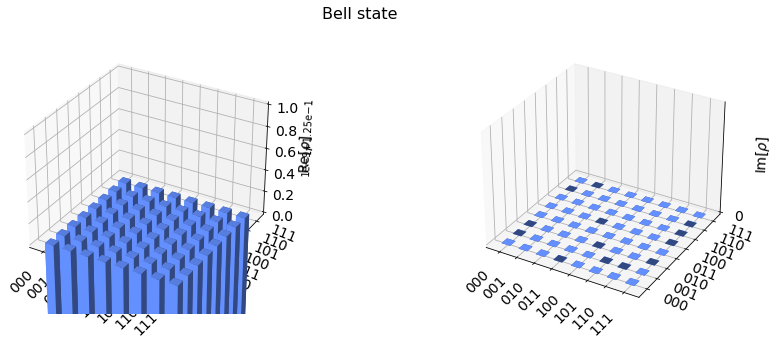

In [3]:
# Construct quantum circuit without measure
circ = QuantumCircuit(3)
circ.h([0, 1, 2])

# Select the StatevectorSimulator from the Aer provider
simulator = Aer.get_backend('statevector_simulator')

# Execute and get counts
result = execute(circ, simulator).result()
statevector = result.get_statevector(circ)
plot_state_city(statevector, title='Bell state')

In [4]:
statevector

array([0.35355339+0.j, 0.35355339+0.j, 0.35355339+0.j, 0.35355339+0.j,
       0.35355339+0.j, 0.35355339+0.j, 0.35355339+0.j, 0.35355339+0.j])

In [5]:
import qiskit.quantum_info as qi
import numpy as np
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)

In [6]:
qi.Statevector.from_instruction(qc)

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))

In [7]:
qi.Statevector(np.array([1, 0, 1, 0]) / np.sqrt(2))

Statevector([0.70710678+0.j, 0.        +0.j, 0.70710678+0.j,
             0.        +0.j],
            dims=(2, 2))

In [8]:
np.sqrt(0.5) * (qi.Statevector.from_label('00') + qi.Statevector.from_label('11'))

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))

In [9]:
qi.Statevector.from_label('00').evolve(qc)

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))

In [13]:
circ = QuantumCircuit(2)
circ.x([0, 1])
circ.h(0)

simulator = Aer.get_backend('unitary_simulator')

# Execute and get counts
result = execute(circ, simulator).result()
unitary = result.get_unitary(circ)
print("Circuit unitary:\n", unitary)

Circuit unitary:
 [[ 0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.70710678-8.65956056e-17j  0.70710678+0.00000000e+00j]
 [ 0.        +0.00000000e+00j  0.        +0.00000000e+00j
  -0.70710678+8.65956056e-17j  0.70710678+0.00000000e+00j]
 [ 0.70710678-8.65956056e-17j  0.70710678+0.00000000e+00j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j]
 [-0.70710678+8.65956056e-17j  0.70710678+0.00000000e+00j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j]]


In [24]:
import qiskit.quantum_info as qi
from qiskit.circuit.library import HGate, CXGate
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)

In [25]:
qi.Operator(qc)

Operator([[ 0.70710678+0.j,  0.70710678+0.j,  0.        +0.j,
            0.        +0.j],
          [ 0.        +0.j,  0.        +0.j,  0.70710678+0.j,
           -0.70710678+0.j],
          [ 0.        +0.j,  0.        +0.j,  0.70710678+0.j,
            0.70710678+0.j],
          [ 0.70710678+0.j, -0.70710678+0.j,  0.        +0.j,
            0.        +0.j]],
         input_dims=(2, 2), output_dims=(2, 2))

In [26]:
qi.Operator.from_label('II').compose(HGate(), [0]).compose(CXGate(), [0, 1])

Operator([[ 0.70710678+0.j,  0.70710678+0.j,  0.        +0.j,
            0.        +0.j],
          [ 0.        +0.j,  0.        +0.j,  0.70710678+0.j,
           -0.70710678+0.j],
          [ 0.        +0.j,  0.        +0.j,  0.70710678+0.j,
            0.70710678+0.j],
          [ 0.70710678+0.j, -0.70710678+0.j,  0.        +0.j,
            0.        +0.j]],
         input_dims=(2, 2), output_dims=(2, 2))

In [29]:
# qi.Operator.from_label('HI')+qi.Operator.from_label('CX')
qi.Operator.from_label('HI')#+qi.Operator.from_label('CX')

Operator([[ 0.70710678+0.j,  0.        +0.j,  0.70710678+0.j,
            0.        +0.j],
          [ 0.        +0.j,  0.70710678+0.j,  0.        +0.j,
            0.70710678+0.j],
          [ 0.70710678+0.j,  0.        +0.j, -0.70710678+0.j,
            0.        +0.j],
          [ 0.        +0.j,  0.70710678+0.j,  0.        +0.j,
           -0.70710678+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))

In [21]:

qi.Operator.from_label('II').compose(qc)

Operator([[ 0.70710678+0.j,  0.70710678+0.j,  0.        +0.j,
            0.        +0.j],
          [ 0.        +0.j,  0.        +0.j,  0.70710678+0.j,
           -0.70710678+0.j],
          [ 0.        +0.j,  0.        +0.j,  0.70710678+0.j,
            0.70710678+0.j],
          [ 0.70710678+0.j, -0.70710678+0.j,  0.        +0.j,
            0.        +0.j]],
         input_dims=(2, 2), output_dims=(2, 2))

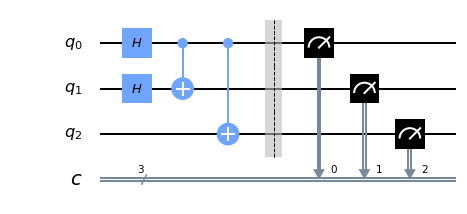

In [38]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi

qreg_q = QuantumRegister(3, 'q')
creg_c = ClassicalRegister(3, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.h(qreg_q[0])
circuit.h(qreg_q[1])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.cx(qreg_q[0], qreg_q[2])
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2])
circuit.measure(qreg_q[0], creg_c[0])
circuit.measure(qreg_q[1], creg_c[1])
circuit.measure(qreg_q[2], creg_c[2])

circ.draw('mpl')


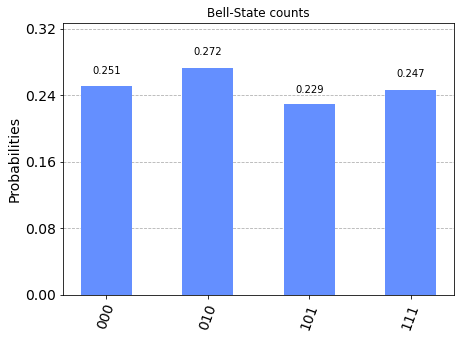

In [41]:
circ = circuit
# Select the QasmSimulator from the Aer provider
simulator = Aer.get_backend('qasm_simulator')

# Execute and get counts
result = execute(circ, simulator).result()
counts = result.get_counts(circ)
plot_histogram(counts, title='Bell-State counts')

In [80]:
qc = QuantumCircuit(2)
qc.h([0,1])
qc.measure_all()
     
result = execute(qc, QasmSimulator(), shots=15, memory=True).result()
memory = result.get_memory(qc)
print(memory)
     

['01', '00', '10', '10', '11', '00', '10', '10', '11', '01', '00', '01', '00', '01', '00']


In [65]:
qc = QuantumCircuit(2)
qc.h([0,1])
qc.measure_all()
     
result = execute(qc, QasmSimulator(), shots=15, memory=False).result()
memory = result.get_memory(qc)
print(memory)
     

QiskitError: 'No memory for experiment "        ┌───┐ ░ ┌─┐   \n   q_0: ┤ H ├─░─┤M├───\n        ├───┤ ░ └╥┘┌─┐\n   q_1: ┤ H ├─░──╫─┤M├\n        └───┘ ░  ║ └╥┘\nmeas_0: ═════════╩══╬═\n                    ║ \nmeas_1: ════════════╩═\n                      ".'

## 1. Circuts

#### Q3

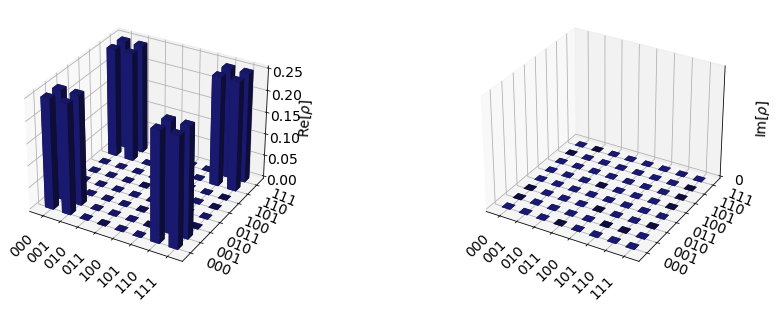

In [19]:
qc = QuantumCircuit(3)
qc.h([0, 1])
qc.cx(0, 1)
qc.cx(1, 2)
qc.draw(output='mpl')

# qc.measure([0, 1], [0, 1])

backend = BasicAer.get_backend('statevector_simulator')
job = execute(qc, backend).result()
plot_state_city(job.get_statevector(qc), color=['midnightblue', 'midnightblue'])

#### Q4

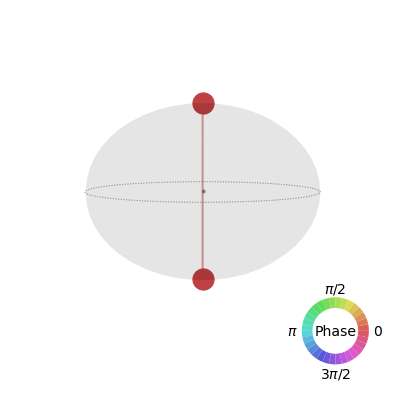

In [23]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)

backend = BasicAer.get_backend('statevector_simulator')
job = execute(qc, backend).result()
plot_state_qsphere(job.get_statevector(qc))

#### Q5

In [33]:
backend = BasicAer.get_backend('unitary_simulator')
q = QuantumRegister(1)

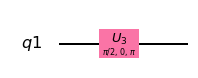

In [35]:
qc = QuantumCircuit(q)
qc.u3(pi/2,0,pi,q)
qc.draw(output='mpl')

In [36]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[ 0.707+0.j,  0.707-0.j],
       [ 0.707+0.j, -0.707+0.j]])

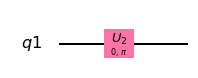

In [38]:
qc = QuantumCircuit(q)
qc.u2(0, pi,q)
qc.draw(output='mpl')

In [39]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[ 0.707+0.j,  0.707-0.j],
       [ 0.707+0.j, -0.707+0.j]])

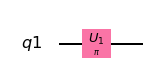

In [40]:
qc = QuantumCircuit(q)
qc.u1(pi,q)
qc.draw(output='mpl')

In [41]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)


array([[ 1.+0.j,  0.+0.j],
       [ 0.+0.j, -1.+0.j]])

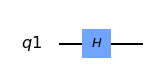

In [43]:
qc = QuantumCircuit(q)
qc.h(0)
qc.draw(output='mpl')

In [44]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)



array([[ 0.707+0.j,  0.707-0.j],
       [ 0.707+0.j, -0.707+0.j]])

### 4. Perform Simulation locally

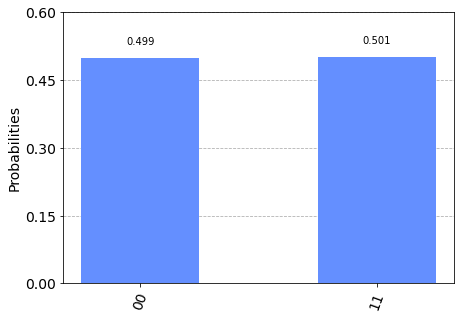

In [19]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circut, backend = simulator).result()
plot_histogram(result.get_counts(circut))

### 5. Perform Simulation on actual Quantum Computer

In [11]:
provider = IBMQ.get_prplot_histogramm-q')
qcomp = provider.get_backend('ibmq_16_melbourne')
job = execute(circut, backend=qcomp)

job_monitor(job)

Job Status: job has successfully run


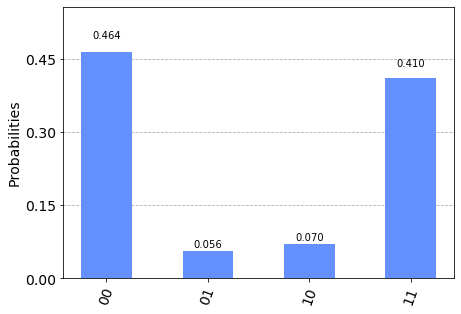

In [12]:
result = job.result()
plot_histogram(result.get_counts(circut))